# Parameters and import data

In [1]:
# General import 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random 
from scipy.stats import uniform,loguniform, randint

# Stop warnings
import warnings
warnings.filterwarnings("ignore")

#sklearn import
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# tensorflow import
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D,Dense, Dropout, Activation, Flatten
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.regularizers import L1,L2,L1L2




# figure imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns

In [2]:
# parameters
n_eye_positions = 25
subject = 'sub-001'
roi = 'V1'

# uncomente for invibe 
# # defind data directory 
# # project_dir = '/home/ulascombes/disks/meso_shared/gaze_exp'
# project_dir = '~/disks/meso_shared/gaze_exp'
# pp_dir = '{}/derivatives/pp_data'.format(project_dir)
# df_fn = "{}/{}/desu".format(pp_dir,subject)

df_fn = '~/Desktop/projet/data'

# tsv names
df_name_GazeLines ='df_task_GazeLines_{roi}_runs.tsv'.format(roi=roi)
df_name_GazeColumns ='df_task_GazeColumns_{roi}_runs.tsv'.format(roi=roi)

# import datas 
df_gazelines =pd.read_table('{}/{}'.format(df_fn,df_name_GazeLines))
df_gazecolumns =pd.read_table('{}/{}'.format(df_fn,df_name_GazeColumns))

### drop 3 first TRs
df_gazelines = df_gazelines.drop(df_gazelines.index[:3]).reset_index(drop=True)
df_gazecolumns = df_gazecolumns.drop(df_gazecolumns.index[:3]).reset_index(drop=True)

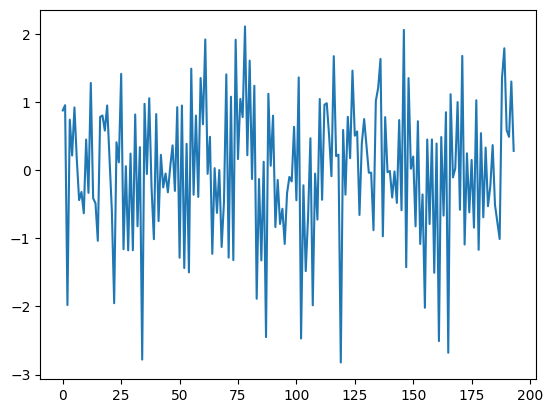

In [3]:
plt.plot(df_gazelines.index, df_gazelines['900'])

# Make an object with eye poisitions on gazelines runs

In [4]:
lines_positions = []
for i in range(n_eye_positions):
    a = i +1
    b = i +1
    lines_positions.append(a)
    lines_positions.append(b)
lines_positions_reverse = sorted(lines_positions, reverse=True)

lines_positions_0 = np.concatenate((lines_positions,lines_positions_reverse[2:]))
gazelines_position = np.concatenate((lines_positions_0,lines_positions_0[2:]))

In [5]:
gazelines_position

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17,
       18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 24,
       24, 23, 23, 22, 22, 21, 21, 20, 20, 19, 19, 18, 18, 17, 17, 16, 16,
       15, 15, 14, 14, 13, 13, 12, 12, 11, 11, 10, 10,  9,  9,  8,  8,  7,
        7,  6,  6,  5,  5,  4,  4,  3,  3,  2,  2,  1,  1,  2,  2,  3,  3,
        4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,  9, 10, 10, 11, 11, 12,
       12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20,
       21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 24, 24, 23, 23, 22, 22, 21,
       21, 20, 20, 19, 19, 18, 18, 17, 17, 16, 16, 15, 15, 14, 14, 13, 13,
       12, 12, 11, 11, 10, 10,  9,  9,  8,  8,  7,  7,  6,  6,  5,  5,  4,
        4,  3,  3,  2,  2,  1,  1])

# Make an object with eye positions on gazecolumns runs

In [6]:
columns_positions = [1,1,10,10,11,11,20,20,21,21,
                     22,22,19,19,12,12,9,9,2,2,
                     3,3,8,8,13,13,18,18,23,23,
                     24,24,17,17,14,14,7,7,4,4,
                     5,5,6,6,15,15,16,16,25,25]
                         
                        
                         
                         

columns_positions_reverse = sorted(columns_positions, reverse=True)

columns_positions_0 = np.concatenate((columns_positions,columns_positions_reverse[2:]))
gazecolumns_position = np.concatenate((columns_positions_0,columns_positions_0[2:]))

In [7]:
gazecolumns_position

array([ 1,  1, 10, 10, 11, 11, 20, 20, 21, 21, 22, 22, 19, 19, 12, 12,  9,
        9,  2,  2,  3,  3,  8,  8, 13, 13, 18, 18, 23, 23, 24, 24, 17, 17,
       14, 14,  7,  7,  4,  4,  5,  5,  6,  6, 15, 15, 16, 16, 25, 25, 24,
       24, 23, 23, 22, 22, 21, 21, 20, 20, 19, 19, 18, 18, 17, 17, 16, 16,
       15, 15, 14, 14, 13, 13, 12, 12, 11, 11, 10, 10,  9,  9,  8,  8,  7,
        7,  6,  6,  5,  5,  4,  4,  3,  3,  2,  2,  1,  1, 10, 10, 11, 11,
       20, 20, 21, 21, 22, 22, 19, 19, 12, 12,  9,  9,  2,  2,  3,  3,  8,
        8, 13, 13, 18, 18, 23, 23, 24, 24, 17, 17, 14, 14,  7,  7,  4,  4,
        5,  5,  6,  6, 15, 15, 16, 16, 25, 25, 24, 24, 23, 23, 22, 22, 21,
       21, 20, 20, 19, 19, 18, 18, 17, 17, 16, 16, 15, 15, 14, 14, 13, 13,
       12, 12, 11, 11, 10, 10,  9,  9,  8,  8,  7,  7,  6,  6,  5,  5,  4,
        4,  3,  3,  2,  2,  1,  1])

# Concate gazelines and gaze columns in axis =0

In [8]:
df_gaze_tot = pd.concat([df_gazelines,df_gazecolumns],axis=0).reset_index()

In [9]:
df_gaze_tot.shape

(388, 9461)

In [10]:
total_position = np.concatenate([gazelines_position,gazecolumns_position],axis=0)

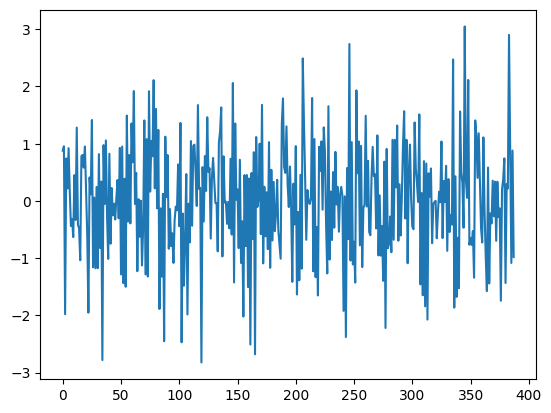

In [11]:
plt.plot(df_gaze_tot.index, df_gaze_tot['900'])

# Make a quarter visual field position object 

In [26]:
quarter_position_tot = np.zeros(len(total_position))

top_left = [1,2,10,9]
top_right = [4,5,7,6]
bottom_left = [20,19,21,22]
bottom_right = [17,16,24,25]
midl_left = [11,12]
midl_right = [14,15]
top_midl = [3,8]
bottom_midl = [18,23]
midle = [13]

for t in range(len(total_position)): 
    if total_position[t] in top_left:
        quarter_position_tot[t] = 1
        
    elif total_position[t] in top_right:
        quarter_position_tot[t] = 2
        
    elif total_position[t] in bottom_left:
        quarter_position_tot[t] = 3
        
    elif total_position[t] in bottom_right:
        quarter_position_tot[t] = 4
        
    elif total_position[t] in midl_left:
        quarter_position_tot[t] = 5

    elif total_position[t] in midl_right:
        quarter_position_tot[t] = 6
        
    elif total_position[t] in top_midl:
        quarter_position_tot[t] = 7
        
    elif total_position[t] in bottom_midl:
        quarter_position_tot[t] = 8
        
    elif total_position[t] in midle:
        quarter_position_tot[t] = 9
    


    
    
    
    

In [27]:
np.unique(quarter_position_tot)

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

# Make a Half visual field position object 

In [28]:
midl_position_tot = np.zeros(len(total_position))

left =[1,2,10,9,11,12,20,19,21,22]
right = [4,5,7,6,14,15,17,16,24,25]
midl = [3,8,13,18,23]

for t in range(len(total_position)): 
    if total_position[t] in left:
        midl_position_tot[t] = 1
        
    elif total_position[t] in right:
        midl_position_tot[t] = 2
        
    elif total_position[t] in midl:
        midl_position_tot[t] = 3
        
    

# Decode position

### Split the data

In [82]:
# concatenated datas
X_train, X_test, y_train, y_test = train_test_split(df_gaze_tot, total_position,stratify=total_position,random_state=42)

# concatenated datas non stratify
# X_train, X_test, y_train, y_test = train_test_split(df_gaze_tot, total_position,random_state=42)

# gazelines
# X_train, X_test, y_train, y_test = train_test_split(df_gazelines, gazelines_position,stratify=gazelines_position,random_state=42)

# gazecolumns
#X_train, X_test, y_train, y_test = train_test_split(df_gazecolumns, gazecolumns_position,stratify=gazecolumns_position,random_state=42)

# quarter position tot
# X_train, X_test, y_train, y_test = train_test_split(df_gaze_tot, quarter_position_tot,stratify=quarter_position_tot,random_state=42)

# quarter position tot non stratify
# X_train, X_test, y_train, y_test = train_test_split(df_gaze_tot, quarter_position_tot,random_state=42)


# midle position tot
# X_train, X_test, y_train, y_test = train_test_split(df_gaze_tot, midl_position_tot,stratify=midl_position_tot,random_state=42)

# midle position tot non stratify
# X_train, X_test, y_train, y_test = train_test_split(df_gaze_tot, midl_position_tot,random_state=42)



# Deep learning

### Réseau de neurones

In [83]:
y_train_2 = y_train - 1
y_test_2 = y_test -1 

In [84]:
y_test

array([ 2, 18, 21, 17,  2, 18, 19, 23, 21, 22, 16, 11, 15, 22, 23, 14,  3,
       12, 19, 11,  9,  6, 18, 19,  6, 25, 10, 20, 13,  8, 22,  3,  1, 25,
        2, 20, 24,  9, 11,  8, 13,  4, 20, 24,  3,  5,  7, 24, 11, 10, 14,
       17, 13, 23,  7, 21, 16, 17, 14,  8,  7, 17, 24,  3, 18,  4, 20,  5,
        1, 14,  1,  8,  4,  4, 13, 22,  5, 15,  6,  5, 10, 19, 21,  6, 12,
       16, 23,  9, 12, 12, 15,  2, 10,  9, 15,  7, 16])

### réseau 1

In [85]:
model_4 = tf.keras.models.Sequential([
    layers.Input(shape=(X_test.shape[1])), 
    
    layers.Dense(256, activation='relu',kernel_regularizer=L1L2(l1=0.01, l2=0.00)),

    
    layers.Dense(128, activation='relu',kernel_regularizer=L1L2(l1=0.01, l2=0.00)), 

    
    layers.Dense(128, activation='relu',kernel_regularizer=L1L2(l1=0.01, l2=0.00)),  

    
    layers.Dense(128, activation='relu',kernel_regularizer=L1L2(l1=0.01, l2=0.00)),  

    
    layers.Dense(25)  
])

model_4.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [90]:
es = EarlyStopping(patience=10,min_delta=0.02, restore_best_weights=True)

history = model_4.fit(
    X_train,
    y_train_2,
    # batch_size=32,
    epochs=10,  
    validation_data=(X_test, y_test_2),
    # callbacks = [es],
    verbose = False 
)

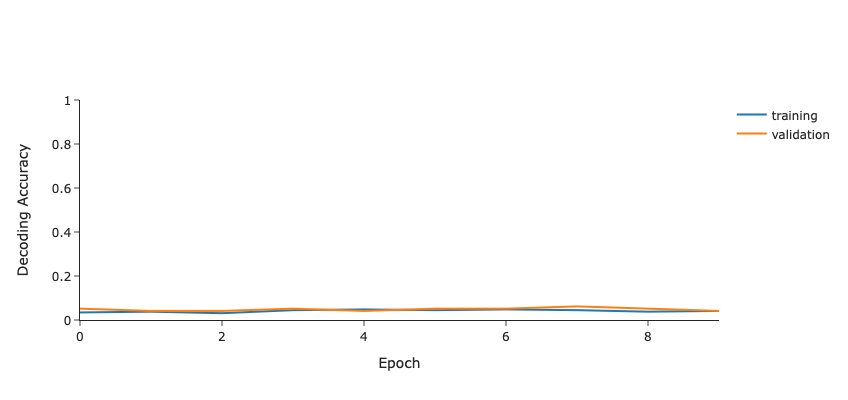

In [91]:
fig = go.Figure()

# Ajoutez les données de formation et de validation au graphique
fig.add_trace(go.Scatter(y=history.history['sparse_categorical_accuracy'],

                         mode='lines',
                         name='training'))

fig.add_trace(go.Scatter(
                         y=history.history['val_sparse_categorical_accuracy'],
                         mode='lines',
                         name='validation'))

fig.update_xaxes(title ='Epoch')
fig.update_yaxes(title ='Decoding Accuracy',range=[0,1])
fig.update_layout(template='simple_white',height=400, width=800)
fig.write_image('/Users/uriel/Desktop/projet/figure/final/deeplearning_{roi}_25.png'.format(roi=roi))


fig.show()

In [92]:
score_train = model_4.evaluate(X_train, y_train_2)
score_test = model_4.evaluate(X_test, y_test_2)

4/4 [==============================] - 0s 14ms/step - loss: 18.5638 - sparse_categorical_accuracy: 0.0412


In [93]:
print('accuracy_score_train_4= ',score_train[1] )
print('accuracy_score_test_2= ',score_test[1] )

accuracy_score_train_4=  0.04810996726155281
accuracy_score_test_2=  0.04123711213469505


### Réseau 2  25 labels

In [132]:
X_train, X_test, y_train, y_test = train_test_split(df_gaze_tot, total_position,stratify=total_position,random_state=42)

In [133]:
y_train_2 = y_train - 1
y_test_2 = y_test -1 

In [146]:
model_5 = tf.keras.models.Sequential([
    layers.Input(shape=(X_test.shape[1])), 
    
    layers.Dense(512, activation='relu',kernel_regularizer=L1L2(l1=0.01, l2=0.00)),

    layers.Dense(128, activation='relu',kernel_regularizer=L1L2(l1=0.01, l2=0.00)),
    layers.Dense(256, activation='relu',kernel_regularizer=L1L2(l1=0.01, l2=0.00)), 

    
    layers.Dense(32, activation='relu',kernel_regularizer=L1L2(l1=0.01, l2=0.00)),  

    
    layers.Dense(64, activation='relu',kernel_regularizer=L1L2(l1=0.01, l2=0.00)),  

    
    layers.Dense(25)  
])

# Compilation du modèle
#model_4.compile(optimizer='adam', loss='SparseCategoricalAccuracy')  

model_5.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [147]:
es = EarlyStopping(patience=10,min_delta=0.02, restore_best_weights=True)

history = model_5.fit(
    X_train,
    y_train_2,
    # batch_size=32,
    epochs=60,  
    validation_data=(X_test, y_test_2),
    # callbacks = [es],
    verbose = False 
)

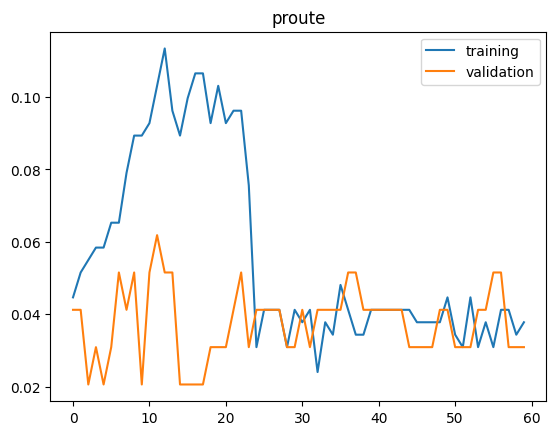

In [148]:
title = 'essais'
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('{}'.format(title))
plt.legend(['training','validation'])
plt.savefig('/Users/uriel/Desktop/projet/figure/deep/{}.png'.format(title))
plt.show()

In [139]:
score_train = model_5.evaluate(X_train, y_train_2)
score_test = model_5.evaluate(X_test, y_test_2)

4/4 [==============================] - 0s 13ms/step - loss: 202.1153 - sparse_categorical_accuracy: 0.0515


In [140]:
print('accuracy_score_train_5= ',score_train[1] )
print('accuracy_score_test_5= ',score_test[1] )

accuracy_score_train_5=  0.30584192276000977
accuracy_score_test_5=  0.05154639109969139


### Réseau 3

In [149]:
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

In [150]:
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],-1, X_train_array.shape[1])
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],-1, X_test_array.shape[1])

In [151]:
model_6 = tf.keras.models.Sequential([
    layers.Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    layers.LSTM(128, activation='relu', return_sequences=True,kernel_regularizer=L1L2(l1=0.1, l2=0.00)),
    # layers.Dropout(0.5),
    layers.LSTM(64, activation='relu', return_sequences=True,kernel_regularizer=L1L2(l1=0.01, l2=0.00)),
    # layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    # layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    # layers.Dropout(0.5),
    layers.Dense(25, activation='softmax')
])

In [152]:
# Compilation du modèle
model_6.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [153]:
es = EarlyStopping(patience=20, restore_best_weights=True)

# Entraînement du modèle
history = model_6.fit(
    X_train_reshaped,
    y_train_2,
    epochs=50,
    batch_size=64, 
    validation_data=(X_test_reshaped, y_test_2),
    # callbacks=[es],
    verbose=False
)

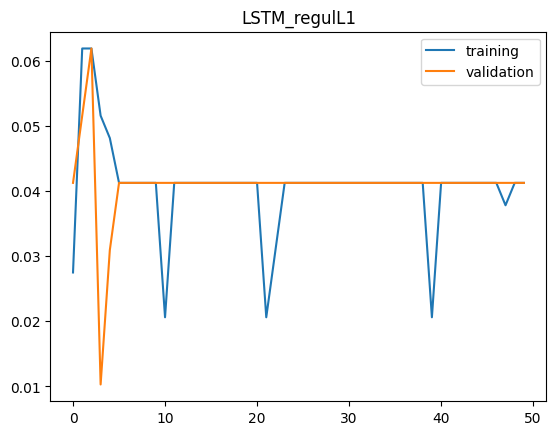

In [154]:
title = 'LSTM_regulL1'
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('{}'.format(title))
plt.legend(['training','validation'])
plt.savefig('/Users/uriel/Desktop/projet/figure/deep/{}.png'.format(title))
plt.show()

### Réseau 3

In [149]:
X_train_reshaped_2 = X_train_array.reshape(-1,X_train_array.shape[0], X_train_array.shape[1])
X_test_reshaped_2 = X_test_array.reshape(-1,X_test_array.shape[0], X_test_array.shape[1])

In [157]:
X_train_reshaped_2 = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_test_reshaped_2 = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)


In [158]:
X_train_reshaped_2.shape

(291, 9461, 1)

In [159]:
input_shape = (X_train_reshaped_2.shape[1], X_train_reshaped_2.shape[2])

In [160]:
model_7 = tf.keras.models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.Dropout(0.5),
    # layers.MaxPooling1D(pool_size=2),  # Vous pouvez ajouter une couche MaxPooling1D si nécessaire
    layers.Flatten(),
    layers.Dense(10, activation='relu'),
    layers.Dense(X_train.shape[1], activation='softmax')
])


In [161]:
model_7.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [162]:
es = EarlyStopping(patience=20, restore_best_weights=True)

# Entraînement du modèle
history = model_7.fit(
    X_train_reshaped_2,
    y_train_2,
    epochs=100,
    batch_size=64, 
    validation_data=(X_test_reshaped_2, y_test_2),
    callbacks=[es],
    verbose=1
)

Epoch 1/100


ValueError: in user code:

    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 9461) are incompatible


# Brouillon

### CNN

In [26]:
batch_size = 32
input_shape = (batch_size,X_train.shape[0],1)

In [97]:
model = tf.keras.models.Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(X_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv1d_6. Consider increasing the input size. Received input shape [None, 1, 9461] which would produce output shape with a zero or negative value in a dimension.

In [28]:
n_eye_positions

25

In [29]:
es = EarlyStopping(patience=20, restore_best_weights=True)
history = model.fit(
    X_train,y_train,
    validation_data= (X_test,y_test),
    epochs=1000,
    callbacks = [es],
    verbose = True)

Epoch 1/1000


ValueError: in user code:

    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/uriel/softwares/anaconda3/envs/desu/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 32, 291, 1), found shape=(None, 9461)


In [ ]:
df_gaze_tot.shape[0]

In [ ]:
X_train.shape[:]